# Práctico 1 - Procesamiento Digital de Imágenes

### Alumno:
#### David Baulina Guzman

In [2]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

[0.85490196 0.34901961 0.18823529]
0.8549019607843137
float64
(512, 512, 3)


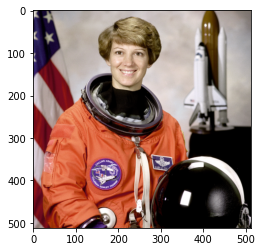

In [4]:
# Cargar la imagen
img_rgb = imageio.imread('imageio:astronaut.png') / 255


# Mostrar la imagen
plt.imshow(img_rgb)

print(img_rgb[300, 150])

canal_rojo = img_rgb[:,:,0]
print(canal_rojo[300, 150])

print(img_rgb.dtype)


print(img_rgb.shape)

## Seleccionar el canal rojo

[0.85490196 0.         0.        ]


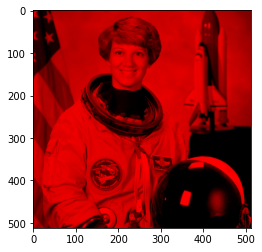

In [5]:
M = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])

img_canal_rojo = apply_matrix(img_rgb, M)

print(img_canal_rojo[300,150])

plt.imshow(img_canal_rojo)

## Imagen en escala de grises

float64


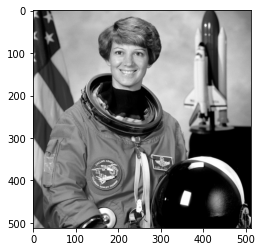

In [6]:
M = np.ones((3,3))/3

img_gris = apply_matrix(img_rgb, M)
print(img_gris.dtype)

plt.imshow(img_gris)

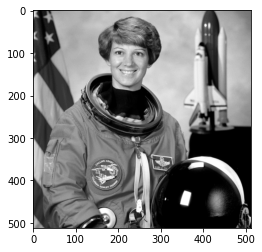

In [7]:
img_gris_2 = img_gris[:,:,0]

plt.imshow(img_gris_2, 'gray')

## Otros mapas de colores

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

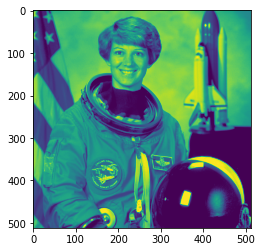

In [8]:
plt.imshow(img_gris_2)

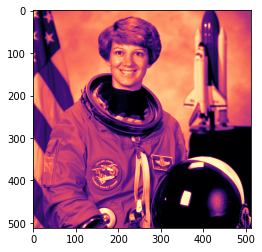

In [9]:
plt.imshow(img_gris_2, 'magma')

## Matriz aleatoria

[[0.62684751 0.34653465 0.70550636]
 [0.28422132 0.5319779  0.55450417]
 [0.52807212 0.8524397  0.72620288]]


Text(0.5, 1.0, 'Imagen reconvertida a RGB')

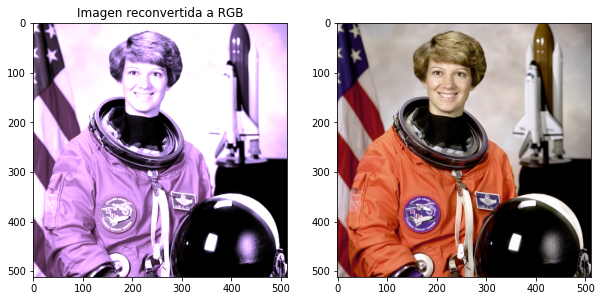

In [10]:
M = np.random.rand(3, 3)

img_random = apply_matrix(img_rgb, M)

M_inv = np.linalg.inv(M)
img_random_inv = apply_matrix(img_random, M_inv)

print(M)

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(np.clip(img_random, 0, 1))
axes[0].set_title('Matriz aleatoria')
axes[1].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Imagen reconvertida a RGB')

## 1. Intercambiar los canales: R->G, G->B, B->R

In [11]:
h,w,c = img_rgb.shape
R_img_array = np.zeros ((h, w, 3), dtype = float) 
G_img_array = np.zeros ((h, w, 3), dtype = float) 
B_img_array = np.zeros ((h, w, 3), dtype = float)

Valores para un pixel en la imagen original, el orden de los valores es rojo, verde y azul:  [0.85490196 0.34901961 0.18823529]
Valores para el mismo pixel, en nuestra imagen que solo posee el canal verde, pero con valores sacados del canal rojo: [0.         0.85490196 0.        ]


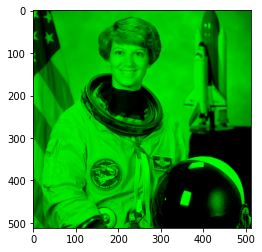

In [12]:
G_img_array[:,:,1]=img_rgb[:,:,0]
plt.imshow(G_img_array)
print("Valores para un pixel en la imagen original, el orden de los valores es rojo, verde y azul: ", img_rgb[300,150])
print("Valores para el mismo pixel, en nuestra imagen que solo posee el canal verde, pero con valores sacados del canal rojo:", G_img_array[300,150])

En supra podemos observar cómo el primer valor del array de RGB de la imagen original, perteneciente al color rojo, coincide con el segundo valor de array de la imagen que acabamos de crear, que corresponde al canal verde. Deberiamos obtener los mismos resultados a partir de la imagen obtenida con el metodo apply_matrix:

[0.85490196 0.         0.        ]
[0.         0.85490196 0.        ]


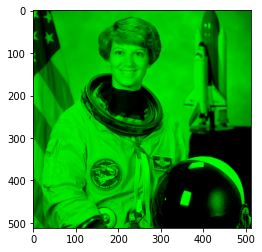

In [13]:
G_img_array[:,:,1]=img_canal_rojo[:,:,0]
plt.imshow(G_img_array)
print(img_canal_rojo[300,150])
print(G_img_array[300,150])

A partir de aquí pasar de un canal a otro la misma información se puede producir con operaciones similares: 

[0.         0.85490196 0.        ]
[0.         0.         0.85490196]


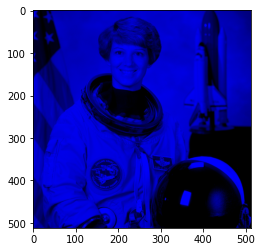

In [14]:
B_img_array[:,:,2]=G_img_array[:,:,1]
plt.imshow(B_img_array)
print(G_img_array[300,150])
print(B_img_array[300,150])

[0.         0.         0.85490196]
[0.85490196 0.         0.        ]


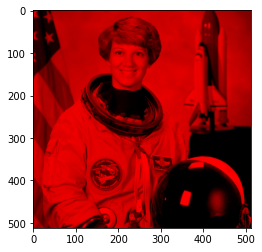

In [15]:
R_img_array[:,:,0]=B_img_array[:,:,2]
plt.imshow(R_img_array)
print(B_img_array[300,150])
print(R_img_array[300,150])

## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

De RGB a YIQ

In [16]:
M = np.array([[0.299,      0.587,        0.114],
  [0.59590059, -0.27455667, -0.32134392],
  [0.21153661, -0.52273617, 0.31119955]])

[0.48194902 0.35312265 0.05697663]


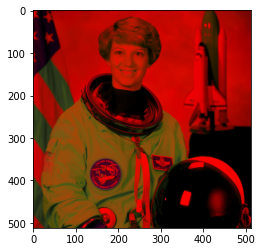

In [17]:
img_YIQ = apply_matrix(img_rgb, M)

print(img_YIQ[300,150])

plt.imshow(img_YIQ)

Multiplicación de canal Y por a>0

In [34]:
M = np.array([[0.3,      0.,        0.],
  [0., 3, 0.],
  [0., 0., 3]])

[0.48194902 0.35312265 0.05697663]
[0.14458471 1.05936796 0.17092989]


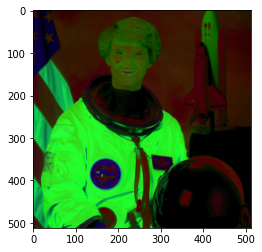

In [35]:
img_YIQ2=apply_matrix(img_YIQ, M)
plt.imshow(img_YIQ2)
print(img_YIQ[300,150])
print(img_YIQ2[300,150])

Multiplicando  los canales IQ por  β>=0

De YIQ a RGB:

In [36]:
def YIQ2RGB(img):
    h,w,c = img.shape
    img_array = np.zeros ((h, w, 3), dtype = float) 
    Y = img[:,:,0]
    I = img[:,:,1]
    Q = img[:,:,2]

    img_array[:,:,0] = (1 * Y) + (0.95598634 * I) + (0.6208248 * Q)
    img_array[:,:,1] = (1 * Y) + (-0.27201283 * I) + (-0.64720424 * Q)
    img_array[:,:,2] = (1 * Y) + (-1.10674021 * I) + (1.70423049 * Q)

    return img_array

[ 1.26344352 -0.25420352 -0.73655649]


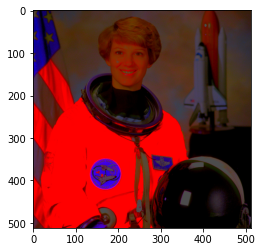

In [37]:
img_RGB2 = YIQ2RGB(img_YIQ2)

print(img_RGB2[300,150])

plt.imshow(img_RGB2)

Truncar los valores RGB al rango [0,1]

In [38]:
img_rgb3 = np.clip(img_RGB2, 0., 1.)

[1. 0. 0.]


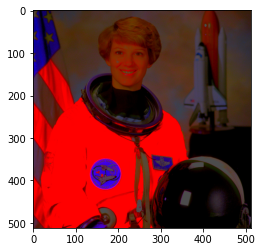

In [39]:
plt.imshow(img_rgb3)
print(img_rgb3[300,150])

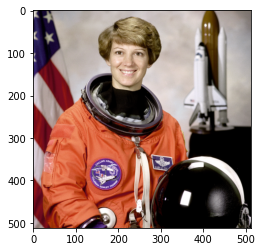

In [40]:
plt.imshow(img_rgb)

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mandelbrot.npy to mandelbrot.npy


<IPython.core.display.Javascript object>


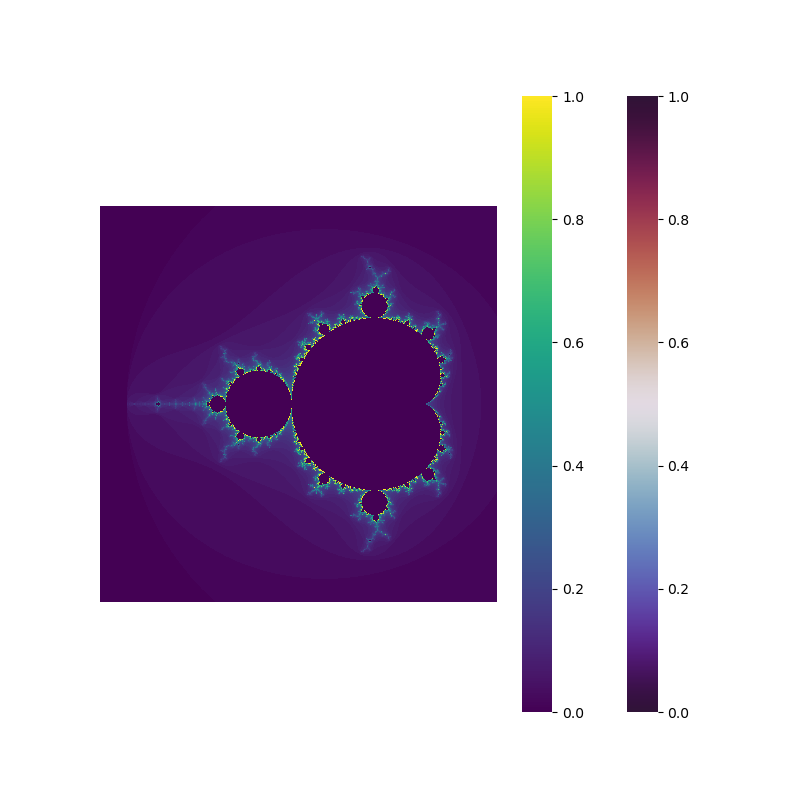

<AxesSubplot:>

In [ ]:
import seaborn as sns
%matplotlib notebook

x = np.load('./mandelbrot.npy')

fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='twilight_shifted', square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


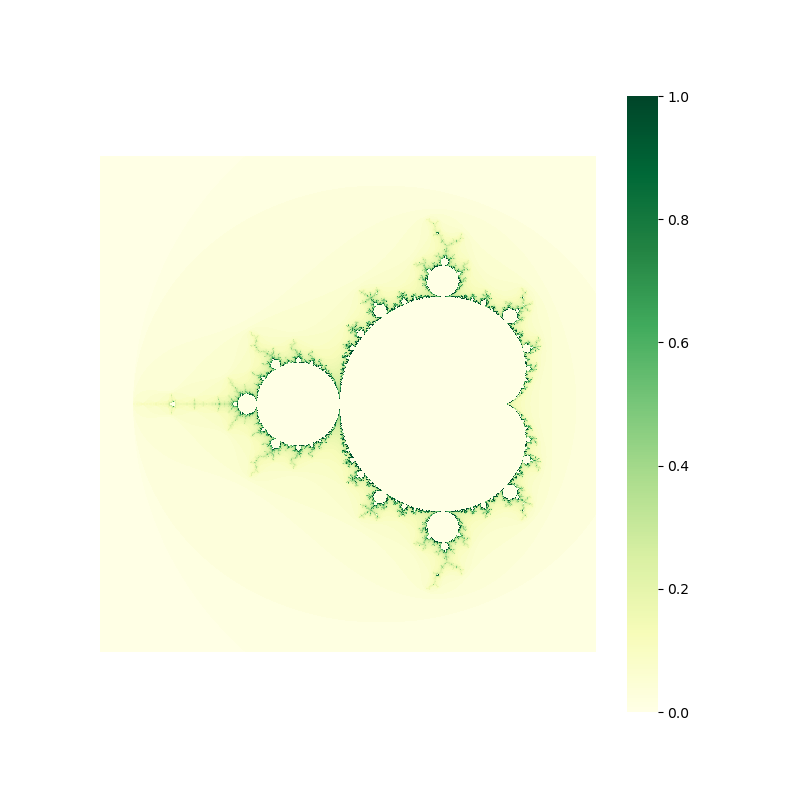

<AxesSubplot:>

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='YlGn', square=True, xticklabels=False, yticklabels=False)

<IPython.core.display.Javascript object>


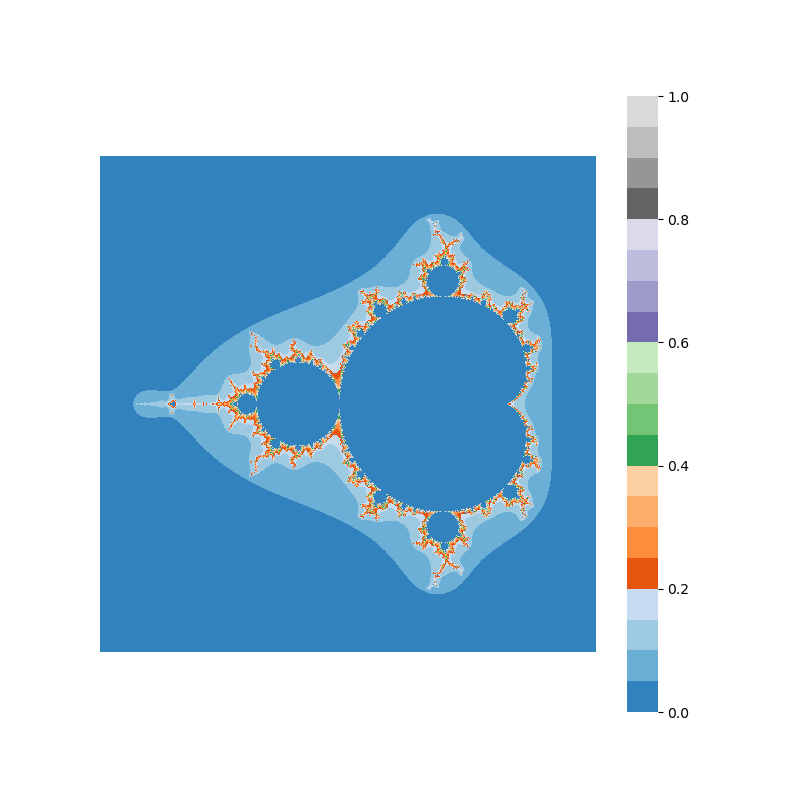

<AxesSubplot:>

In [ ]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(x, cmap='tab20c', square=True, xticklabels=False, yticklabels=False)